# **WASP-100**

In this notebook, we follow the video tutorial provided by the developers of the *eleanor* pipeline. The tutorial can be found in their website (link below). There is also a notebook version of the tutorial (called *online_tess_science_eleanor.ipynb*) in the GitHub repository, with the only difference being the Sector in which the data is recovered from. The video tutorial downloads the WASP-100 data from Sector 1, whereas the tutorial in the repository uses data from Sector 3. This should not affect the final result, as targets can be observed by TESS in multiple sectors due to sector overlaps.

- Website: http://adina.feinste.in/eleanor/
- GitHub repository: https://github.com/afeinstein20/eleanor/blob/main/notebooks/online_tess_science_eleanor.ipynb


The notes in this notebook are a combination of the existing tutorial notes (by the authors) and notes made by us regarding the results and obstacles we encountered.

In [ ]:
# Connect to Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the eleanor pipeline. We need to install every time the notebook gets disconnected from the Google Drive.

In [ ]:
pip install eleanor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 68.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.6 MB/s eta 0:00:00
  Created wheel for eleanor: filename=eleanor-2.0.5-py2.py3-none-any.whl size=144466 sha256=9f33a4117beaa444093779c951040036fdd05283475305efcc9478d4e4e4b

In [ ]:
# Import "Image" class to display images in the notebook.
from IPython.display import Image

# Instruct Python to ignore and not display warning messages.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the necessary modules.
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

plt.rcParams['font.size'] = 16   # Set the font size for text.

The code in the next cell is to update *eleanor* to include the newly digested sectors. The first line, updates for all sectors, while the second updates the pipeline for a sector of our choice. However, it appears that the general update does not work. We can only update to include specific sectors.

While it might seem an important step, it is not necessary as *eleanor* can download the data during the initiating step where we choose our target (next section).

In [ ]:
# eleanor.Update()
# eleanor.Update(sector=27)

## Initiating *eleanor.Source*

Here we choose the target star and the sector it was observed in. Note that sectors partially overlap, so a target can be observed through several sectors. The *eleanor.Source* object will take the name of the target and get some basic information for it. It crossmatches the target with the TIC ID, Gaia ID and RA & Dec coordinates and download information from all of those sources. The data products that are downloaded are a postcard for the target in the specific sector, a 2D background model on the postcard level and a pointing model.

We can also completely leave out the "sector" parameter. In that case, *eleanor* will download information on our target from the most recent sector it was observed in.

In [ ]:
star = eleanor.Source(name='WASP-100', sector=1)

Most recent sector available =  69
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  1...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector  1 now available.


Now that everything has been downloaded, we can check the different ID numbers (TIC and Gaia) and coordinates (RA and Dec) from the

cross-checking *eleanor* has done.

In [ ]:
star.tic, star.coords, star.gaia

(38846515, (68.95970874999999, -64.02703694444445), 4675352109659600000)

We can also get information on where the target was observed on the TESS CCD cameras.

In [ ]:
star.sector, star.camera, star.chip

(1, 4, 1)

## Making a light curve

We now have everything we need to make a light curve. To do this we first create an *eleanor.TargetData* object. Some additional arguments we can use are setting the Target Pixel File (TPF) height and width, creating a Point-Spread Function (PSF) modelled light curve and creating a Principal Component Analysis light curve (PCA). All can be used for light curve comparison.

**NOTE:** This is not a comparison between different pipelines for evaluation purposes. This is a comparison of different types of light curves created by *eleanor* for our target. The light curves are the result of different corrections applied to the data.



---


***ISSUES WE ENCOUNTERED***

For the creation of the PSF light curve, TensorFlow is used. However, we encountered an issue, as TensorFlow does not contain the attribute "logging" which is needed for the PSF light curve.

In our effort to fix this issue, we tried finding an older version of Tensorflow that might include that attribute, tried to manually install "logging", and uninstalled and re-installed Tensorflow. No currently existing version of Tensorflow contains that attribute. Versions below 2.0 are needed for the code to work and those are not available anymore.

In our search for a solution, we found a conversation within the eleanor GitHub repository discussing this very issue (check *eleanor* collaborator discussions below).

The collaborator had a couple of suggestions on how to fix this, one way being having separate environments with different versions of Tensorflow so they do not clash. However, seeing that versions below 2.0 do not exist anymore, this was not a viable option.

Another option was to **NOT** create PSF light curves at all. As mentioned above, the "logging" attribute is only needed when the "do_psf" parameter is called (do_psf=True). So, if PSF light curves are not created, nothing else will be affected by the missing attribute. However, this automatically means that part of this code is not reproducible and PSF light curves will not be created for the target objects.


**Links to GitHub discussions regarding this issue:**

\#188: https://github.com/afeinstein20/eleanor/issues/188

\#126: https://github.com/afeinstein20/eleanor/issues/126

---

The cells below show the steps we took to fix the attribute error. Here they have been commented out as they are not needed.

In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow

In [ ]:
# Downgrading to the earliest version available - 2.8.0rc0.
# pip install tensorflow==2.8.0

In [ ]:
# Installing the latest version of Tensorflow.
# !pip install --upgrade tensorflow

In [ ]:
# Trying to install "logging".
# !pip install tensorflow-logging

# Get the message below:
# ERROR: Could not find a version that satisfies the requirement tensorflow-logging (from versions: none)
# ERROR: No matching distribution found for tensorflow-logging

In [ ]:
# Checking which version we have.
import tensorflow as tf
print(tf.__version__)

2.14.0


According to the tutorial, the code in the cell below should be:

*data = eleanor.TargetData(star, do_psf=True, do_pca=True)*

However, due to the issue stated above, we did not call the "do_psf" parameter and continued with the rest of the code.

In [ ]:
# Creating light curves for the target star.
data = eleanor.TargetData(star, do_pca=True)

The eleanor light curves are tailored to find transits. So, it's trying to minimise the combined differential photometric precision (noise out of transit). We can do three different background subtractions:

1. 1D postcard background: constant value that is calculated for each postcard frame, masking all the stars in that region.
  - data.bkg_type = 'PC_LEVEL' : keyword = data.flux_bkg
2. 1D TPF (target pixel file) background: constant value calculated for each TPF frame, masking all the stars in that region.
  - 1D TPF background : data.bkg_type = 'TPF_LEVEL' : keyword = data.tpf_flux_bkg
3. 2D background: a model background that the developers created and was downloaded when we created the *eleanor.Source* object.
  - data.bkg_type = 'TPF_2D_LEVEL' : keyword = data.bkg_tpf (post_obj.background2d)


An example of a 2D background is shown in the plot below.


***UPDATE***

The background image that we get is different to the one in the tutorial. This could be due to updates done to *eleanor* since the tutorial was made.

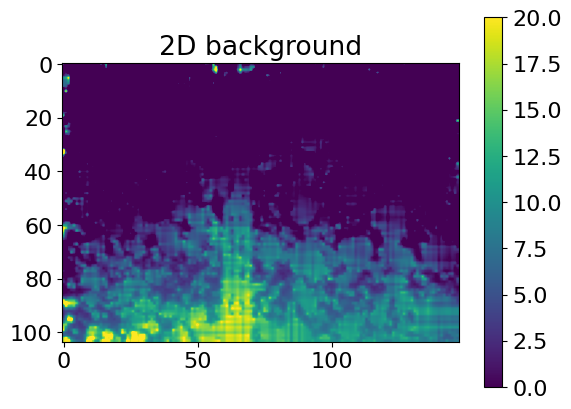

In [ ]:
plt.title('2D background')
plt.imshow(data.post_obj.background2d[100], vmin=0, vmax=20)
plt.colorbar();

There are a lot of stars in this field and we can see the bright regions used for background subtraction.

In the next cell, we can see which background produced the best light curve. *eleanor* light curves are optimised for transit searches, so the CDPP was minimised (combined differential photometric precision) to define the "best". The result is "2D_BKG_LEVEL", meaning that the 2D level background removed the most systematics.

***UPDATE***

The result in the tutorial is "PC_LEVEL", which means that the 1D postcard level background removed the most systematics. This is not what we get here! This could be because we do not have a PSF light curve and the programme has less light curves to work with and choose the best background **OR** updates have been done to *eleanor* that made it choose a different type of background subtraction as the most optimal one.

In [ ]:
data.bkg_type

'2D_BKG_MODEL'

Below we plot the background flux (energy received per unit area) over time (BJD).



---


**BJD:** Barycentric Julian Date, the Julian Date corrects for differences in the Earth's position with respect to the barycentre of the Solar System. Due to the finite speed of light, the time an astronomical event is observed depends on the changing position of the observer in the Solar System. Before multiple observations can be combined, they must be reduced to a common, fixed, reference location. This correction also depends on the direction to the object or event being timed.

(*Wikipedia*: https://en.wikipedia.org/wiki/Barycentric_Julian_Date)

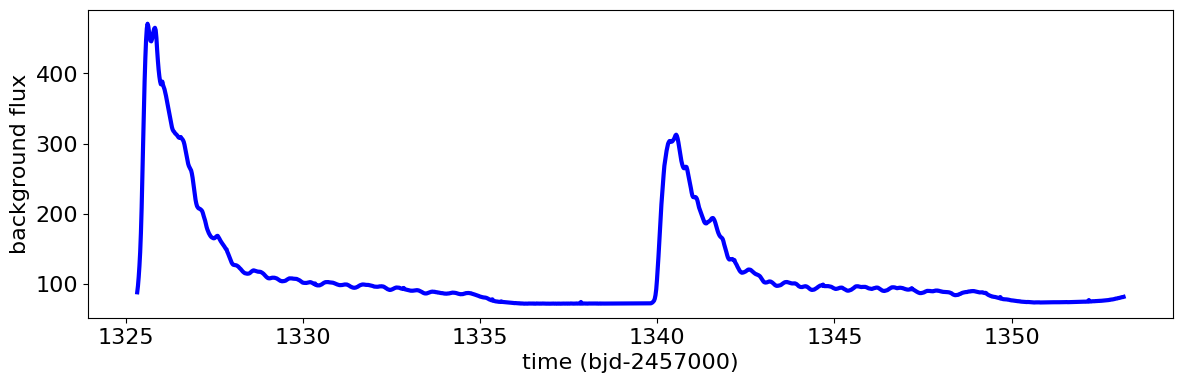

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(data.time, data.post_obj.bkg, 'b', lw=3)        # Changed the line colour from 'w' to 'b' to see it.
plt.xlabel('time (bjd-2457000)')
plt.ylabel('background flux');

This is a typical background plot for TESS. The peaks occur at the end of each orbit, which is expected. During the processing of the light curve, the programme will subtract these values.

***UPDATE***

As expected, we get a different curve than the one in the video tutorial. This is due to the different background result we got in the previous cells.

*eleanor* also tests an entire suite of apertures (the diameter of the lens or mirror the telescope uses to collect light - they can be different sizes or shapes). The aperture selected by *eleanor* also minimises CDPP. So, by testing all the different apertures with the different backgrounds, we hope to get the cleanest light curve for transits as possible. The aperture over the selected target is shown below:

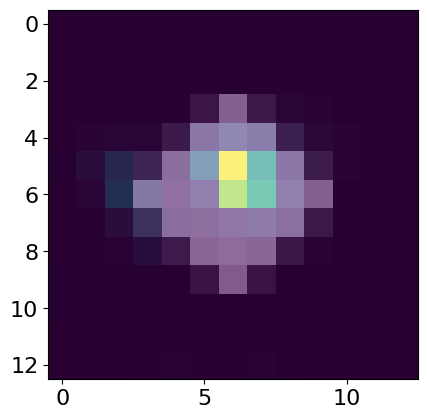

In [ ]:
plt.imshow(data.tpf[100])
plt.imshow(data.aperture, alpha=0.4, cmap='Greys_r');

The brighter/more yellow areas show the location of the star. The further away we get from the star the less energy we receive from those regions.

***UPDATE***

Again, this is different to what the developers got in their tutorial. In their image they get the star in the middle and possibly another fainter (or further away) star at the top left. We do not get a region with a possible second star. Our aperture also seems to be larger and incorporate more area around the star.

While it might be normal for apertures to change from sector to sector, it is interesting that we get something different for the same object in the same sector. This is also possibly related to the initial light curve we were able to produce and not taking into account the PSF light curve.

We can also use the *eleanor.Visualise* class to visualise the aperture better. We pass in the data from the *eleanor.TargetData* object and can overplot the contour, set colours, etc.

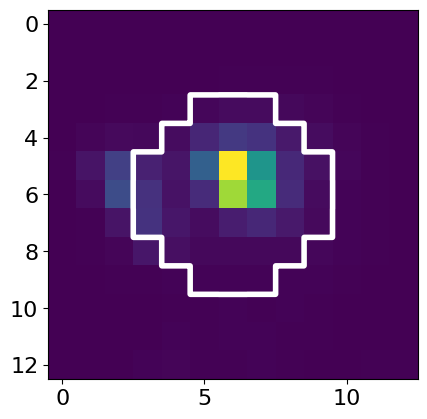

In [ ]:
vis = eleanor.Visualize(data)
fig = vis.aperture_contour()
plt.gca().invert_yaxis()               # This line of code was added by me.

There is consistency in that we get the same apperture as before and same image (since our data has not changed). However, the y-axis was inverted compared to our first image of the star and to what the developers got in the tutorial. We had to add an extra line of code to fix that.

## Plotting the light curve

Here we plot the light curves produced by eleanor for the different types of corrections that it can do.

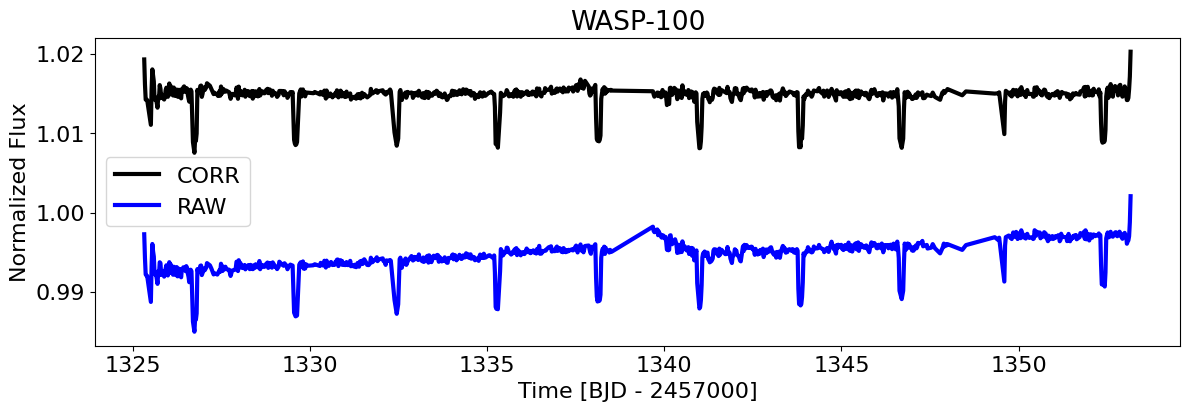

In [ ]:
q = data.quality == 0         # Mask bad cadences with the quality flags set by the developers.

plt.figure(figsize=(14,4))    # Set figure size.

#plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) - 0.005, 'b', lw=3, label='RAW')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.015, 'k', lw=3, label='CORR')

# Moved this line of code from the top to get a more consistent legend.
plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) - 0.005, 'b', lw=3, label='RAW')

#plt.ylim(0.98, 1.02)               # This line is used in the tutorial. It just changes the limits of the y-axis.
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-100')
plt.legend();

**RAW:** The data has NOT been background subtracted.

**CORR:** Corrected flux, uses PCA regressor. It appears flatter than the raw data light curve. Long-term trends in our data are removed with the corrected flux.

---
**UPDATE**

There are many differences between our results and the tutorial. First, the raw flux in our plot has an upward trend, whereas in the tutorial is downward. Also, the break between the two sections of the lines is smoother in the tutorial. The time coordinates are different (ours are at an earlier time compared to the tutorial) and the number of transits (dips) is different.

However, our plot (as we will also see below) is almost identical to the one the authors used in their paper for WASP-100, i.e., we get the same number of transits at the same exact time coordinates, which is the most important thing.

---

Quality flags come from 2 places:

1. They use a 2-minute cadence target per sector camera CCD and bend that down to the 30-minute data. If there is a quality flag, that applies to the full-frame image and they put that in the quality flags.
2. From the pointing model, if they notice that there are some very high sigma (σ) outliers compared to other frames, the quality flags will mask those as well.


---


Below we plot all the available *eleanor* light curves. When we compare this plot to the one in the paper, we see that they are identical (as explained above).

It is unclear why the tutorial and the paper have different results for the same target (in the same sector). However, it could be due to updates in TESS data from the time the tutorial was made to the time the paper was written and published. As we are comparing our results to those of the paper, we can say with certainty that the WASP-100 plot has been successfully reproduced.

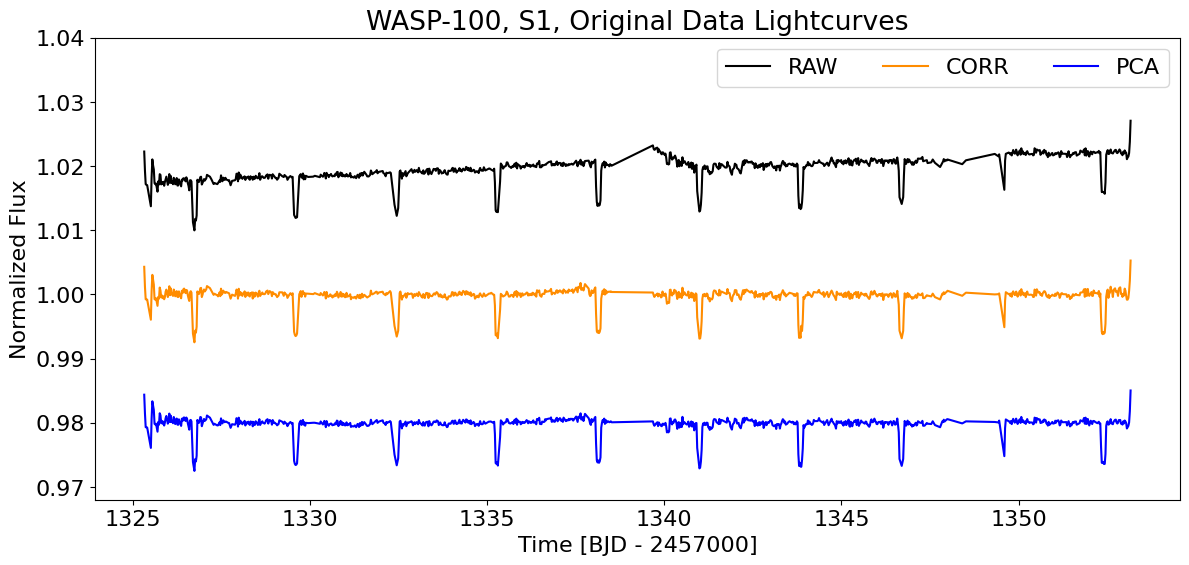

In [ ]:
q = data.quality == 0         # Mask bad cadences witht he quality flags det by the developers.

plt.figure(figsize=(14,6))    # Set figure size.

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) + 0.02, 'k', label='RAW')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]), 'darkorange', label='CORR')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q])-0.02, 'b', label='PCA')
#plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylim(0.968, 1.04)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-100, S1, Original Data Lightcurves')
#plt.legend(loc='best');
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.legend(ncol=3);

By calling *eleanor.to_lightkurve()*, we will get a *lightkurve.LightCurve* object. We can specify which flux we want passed into the object.

This is also used to download the light curves from the TASOC and Oelkers & Stassun pipelines, for comparison.


In [ ]:
lc = data.to_lightkurve(flux=data.corr_flux)

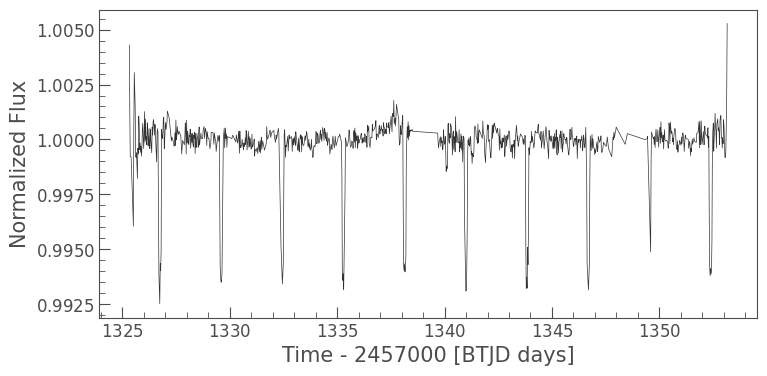

In [ ]:
lc.normalize().plot();

Our results for the normalised corrected flux using the *lightkurve.LightCurve* object, are different to those of the tutorial. This is to be expected as our initial light curves already had important differences compared to the tutorial.

## Multisector Light Curves

Targets are observed over multiple sectors and we can get the data from each sector.

However, for our project, we only focused on creating a light curve from one sector at a time as the original targets in the paper were observed in a single sector. We, therefore, decided to not include this step in our analysis.

## Using the visualisation object.

Earlier we created an *eleanor.Visualize* object that allowed us to overplot a countour of the aperture on the TPF.

One of the most useful tricks is creating a pixel-by-pixel light curve grid, to see if the signal we're seeing in the light curve is from our source or something nearby.

However, as with the previous section, we decided to not include this step in our analysis as it is not directly relevant to our goals for the project and also does not affect the final outcome.

## Crossmatching

Within *eleanor*, we also have tools to see if our target has a light curve produced by the TASOC team (TESS Asteroseismic Consortium), Oelkers & Stassun difference imaging pipeline, or was observed at a 2-minute cadence.

In [ ]:
# Initialise the crossmatching object.
crossmatch = eleanor.Crossmatch(data)

To check for 2-minute data, we use *lightkurve* behind the scenes:

In [ ]:
crossmatch.two_minute()

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,38846515,0.0
1,TESS Sector 01,2018,TESS-SPOC,1800,38846515,0.0


Because this returns a *lightkurve.SearchResult* object, we can download the data product right from there and go about using the other *lightkurve* tools.


---

To check out the TASOC pipeline, we use *astro query* behind the scenes to get the data products from MAST (Mikulski Archive for Space Telescopes) and plot the light curve. They have their own quality flags so we can use those.

In [ ]:
crossmatch.tasoc_lc()

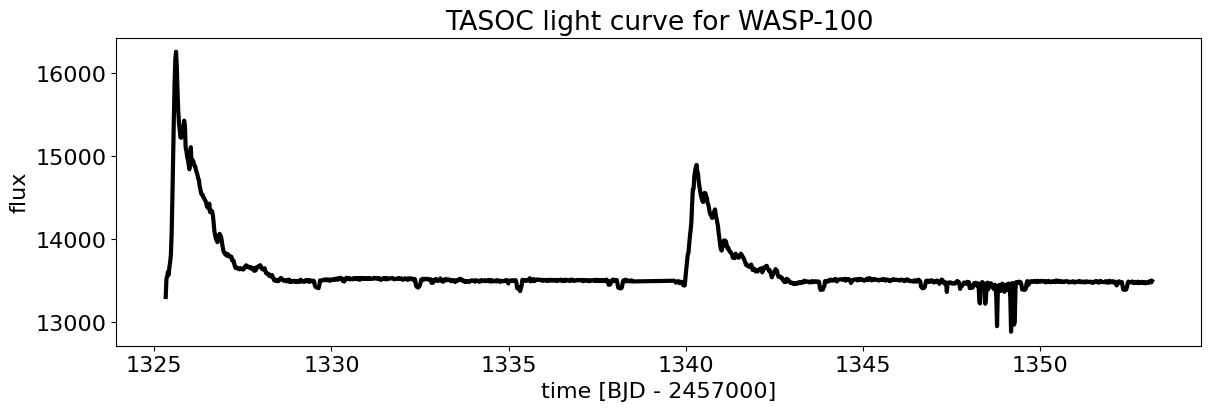

In [ ]:
plt.figure(figsize=(14,4))
q = crossmatch.tasoc_pixel_quality == 0      # Can use TASOC quality flags.
plt.plot(crossmatch.tasoc_time[q], crossmatch.tasoc_flux_raw[q], 'k', lw=3)
# plt.ylim(13300,13600)
plt.title('TASOC light curve for WASP-100')
plt.xlabel('time [BJD - 2457000]')
plt.ylabel('flux');

Our plot looks vastly different to the plot from the tutorial! Ours appears to have less noise. However, there are two very large spikes which seem to harbour two of the ten dips. There is an additional feature right before time=1350. It is unclear why those features exist. A possible reason might be new data being downlinked from TESS (producing different light curves) or changes in the data processing methods by the TASOC team.

Below we check the Oelkers & Stassun light curves. It should be noted these light curves are in magnitudes, which is why they look

upside-down.

In [ ]:
crossmatch.oelkers_lc()

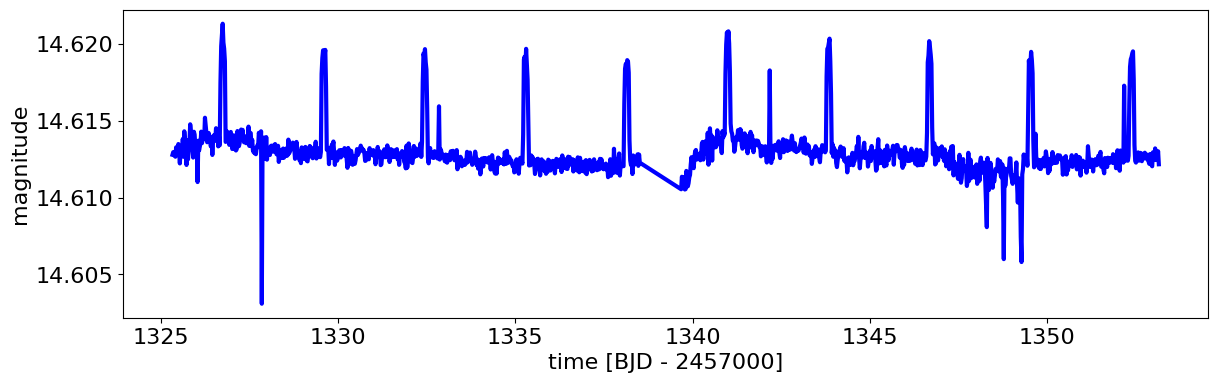

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(crossmatch.os_time, crossmatch.os_mag, 'b', lw=3)
plt.xlabel('time [BJD - 2457000]')
plt.ylabel('magnitude');

Our result is identical to the plot from the tutorial. Since this is used to cross-check the transit resutls between different pipelines, it appears that no changes have been made to the O&S pipeline or data.

## Comparison plot (similar to Fig.7 in paper)

We can now plot all light curves together and compare. A comparison plot was not made for WASP-100 in the paper nor was it shown in the tutorial. However, we did the comparison to familiarise ourselves with the process as it is required for the evaluation process for the second target in the paper.

The code for the plot was found in one of the Python notebooks (*vis_crossmatch.ipynb*) in the GitHub repository: https://github.com/afeinstein20/eleanor/blob/main/notebooks/vis_crossmatch.ipynb



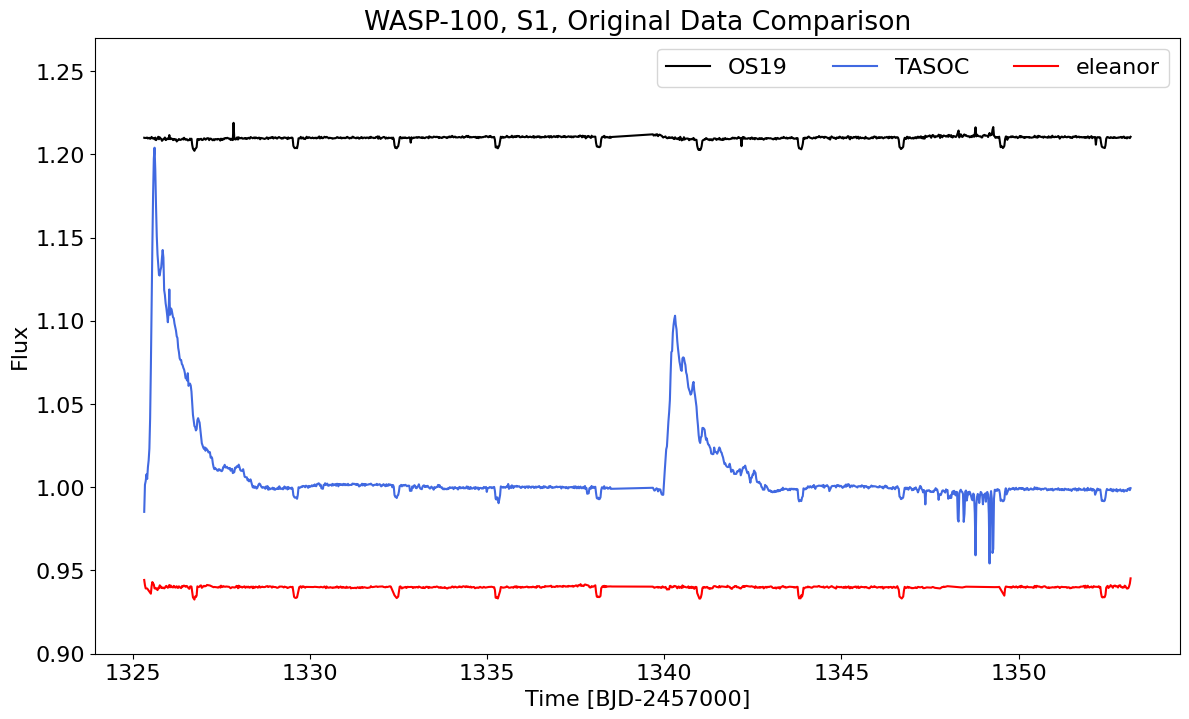

In [ ]:
plt.figure(figsize=(14,8))

e = data.quality == 0

plt.plot(crossmatch.os_time, 10**(-0.4*crossmatch.os_mag)/np.nanmedian(10**(-0.4*crossmatch.os_mag))+0.21, 'k', label='OS19')

plt.plot(crossmatch.tasoc_time[q], crossmatch.tasoc_flux_raw[q]/np.nanmedian(crossmatch.tasoc_flux_raw[q]), 'royalblue', label='TASOC')

plt.plot(data.time[e], data.corr_flux[e]/np.nanmedian(data.corr_flux[e])-0.06, 'r', label='eleanor')

plt.ylim(0.9, 1.27)
plt.legend(ncol=3)
plt.title('WASP-100, S1, Original Data Comparison')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Flux');

Excluding the large peaks in TASOC, we see that the transits (dips) match for all light curves. This (and the fact that WASP-100 has already been confirmed to have an exoplanet) assures us that the light curves produced by *eleanor* are correct. However, this can only be confirmed by our new dataset.